In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\Working\Jupyter\ex1data2.txt', header = None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()


,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [11]:
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [12]:
x

NameError: name 'x' is not defined

In [13]:
X


,00,0,1
0,1,2104,3
1,1,1600,3
2,1,2400,3
3,1,1416,2
4,1,3000,4
5,1,1985,4
6,1,1534,3
7,1,1427,3
8,1,1380,3
9,1,1494,3


In [14]:
Y

NameError: name 'Y' is not defined

In [15]:
y

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: 2, dtype: int64

In [16]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


In [17]:
theta = np.array([0]*len(X.columns))

In [18]:
m = len(df)

In [19]:
def hypothesis(theta, X):
    return theta*X

In [20]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [21]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [22]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)

In [23]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

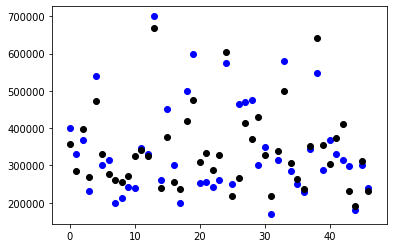

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='black')
plt.show()

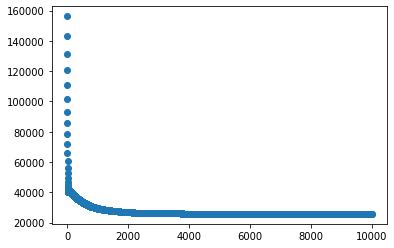

In [25]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()